## Build a simple trading strategy 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Munging the stock data and add two columns - MA10 and MA50

In [4]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
data = pd.read_csv('C:/Users/Usuario/Desktop/proyectos/Analisis_Financiero_1/Datasets/portfolio_data.csv', index_col=0, parse_dates=True)
data['A10'] = data['AMZN'].rolling(10).mean() # fast signal
data['A50'] = data['AMZN'].rolling(50).mean() # slow signal
data = data.dropna()
data.head()

,AMZN,DPZ,BTC,NFLX,A10,A50
Date,,,,,,
2013-07-11,299.660004,59.221333,93.989998,34.881428,286.509000,271.437999
2013-07-12,307.549988,59.531540,98.320000,36.751427,289.509000,272.624399
2013-07-15,306.570007,59.794746,97.099998,36.854286,292.397000,273.704799
2013-07-16,306.869995,59.371735,98.500000,37.211430,294.873999,274.681199
2013-07-17,308.690002,59.268330,90.070000,38.274284,297.369998,275.740599


### 2. Add "Shares" column to make decisions base on the strategy 

Cuando la media móvil rápida (A10) cruza hacia arriba la media móvil lenta (A50), esto indica que el precio está ganando impulso alcista.

- Media móvil rápida (A10): Es el promedio de los últimos 10 días. **Reacciona más rápido** a los cambios de precio.

- Media móvil lenta (A50): Es el promedio de los últimos 50 días. Se mueve **más lentamente** y refleja la tendencia a largo plazo.

In [6]:
#Add a new column "Shares", if A10>A50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

data['Shares'] = [1 if data.loc[ei, 'A10']>data.loc[ei, 'A50'] else 0 for ei in data.index]

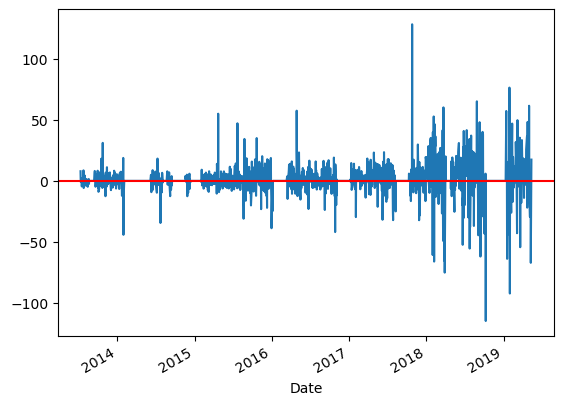

In [7]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss          Profit > 0 Ganacia    Profit < 0 Perdida

data['AMZN_1'] = data['AMZN'].shift(-1)
data['Profit'] = [data.loc[ei, 'AMZN_1'] - data.loc[ei, 'AMZN'] if data.loc[ei, 'Shares']==1 else 0 for ei in data.index]
data['Profit'].plot()     # fb['Profit'].plot(legend=True)
plt.axhline(y=0, color='red')

### 3. Use .cumsum() to display our model's performance if we follow the strategy 

In [8]:
#Use .cumsum() to calculate the accumulated wealth over the period

data['wealth'] = data['Profit'].cumsum()   #Suma acumlada
data.tail()

,AMZN,DPZ,BTC,NFLX,A10,A50,Shares,AMZN_1,Profit,wealth
Date,,,,,,,,,,
2019-05-08,1917.770020,283.149994,6171.959961,364.369995,1928.195007,1804.152398,1,1899.869995,-17.900025,1456.269987
2019-05-09,1899.869995,282.160004,6358.290039,362.750000,1927.957007,1809.327998,1,1889.979980,-9.890015,1446.379972
2019-05-10,1889.979980,278.369995,7191.359863,361.040009,1921.892004,1814.330999,1,1822.680054,-67.299926,1379.080046
2019-05-13,1822.680054,273.880005,7980.129883,345.260010,1910.317004,1817.350000,1,1840.119995,17.439941,1396.519987
2019-05-14,1840.119995,272.859985,8183.830078,345.609985,1901.677002,1820.228999,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 1396.519987')

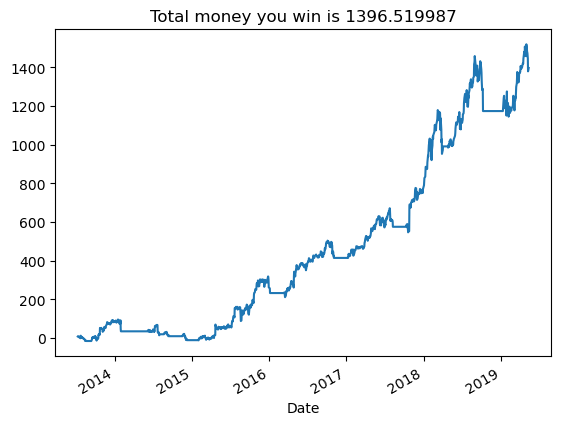

In [9]:
#plot the wealth to show the growth of profit over the period

data['wealth'].plot()   # fb['Profit'].plot(legend=True)
plt.title('Total money you win is {}'.format(data.loc[data.index[-2], 'wealth']))

Esta notebook implementa una estrategia de trading simple basada en medias móviles para evaluar oportunidades de compra y venta de acciones. Se observa que el cruce de la media rápida sobre la lenta puede generar señales de inversión, cuyo rendimiento se mide a través de la riqueza acumulada. La estrategia permite visualizar tendencias y evaluar su rentabilidad con herramientas de análisis de datos.